# Pre-post performance models
In this file we are creating models that are based on the dataset that only contain
individual parameters and the preperformance and the postperformance.

In [1]:
from helpers import print_mean_squared_error, print_coefficient_of_determination

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Preprocess the simpler modell
#Labels 

L = []
for i in range(90):
    L.append(f"rep{i}")
    L.append(f"weight{i}")

L3 = ["age", "person_weight", "gender", "preperformance", "performance"]
L += L3

# Read the CSV file.
data = pd.read_csv("./data/regression_dataframes2.csv", names=L)
data = data[L3]
data = data.dropna()
# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('performance', axis=1)

Y = data_shuffled['performance']
Y.head()

# # Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


In [3]:
data.head()

,age,person_weight,gender,preperformance,performance
0,48.0,86.0,2.0,46.0,61.066083
1,32.0,73.0,1.0,54.0,69.396036
2,25.0,75.0,0.0,38.0,47.263152
3,18.0,62.0,2.0,52.0,63.815772
4,31.0,90.0,1.0,46.0,57.693962


## Regular linear regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#Träna modellen
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)

#Använd på testsettet
Ypred = lr.predict(Xtest)

lr_mean_squared_error = mean_squared_error(Ytest, Ypred)
lr_r2_score = r2_score(Ytest, Ypred)

print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)

Mean squared error: 1.18
Coefficient of determination: 0.98


## Ridge regression

In [34]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)
# Ridge()
ridge_Ypred = ridge.predict(Xtest)


ridge_mean_squared_error = mean_squared_error(Ytest, ridge_Ypred)
ridge_r2_score = r2_score(Ytest, ridge_Ypred)

print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)

Mean squared error: 1.18
Coefficient of determination: 0.98


## Lasso regression

In [6]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
lasso_Ypred = lasso.predict(Xtest)

lasso_mean_squared_error = mean_squared_error(Ytest, lasso_Ypred)
lasso_r2_score = r2_score(Ytest, lasso_Ypred)

print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)

Mean squared error: 1.20
Coefficient of determination: 0.98


## Summaries of the results

Normal linear regression:
Mean squared error: 1.18
Coefficient of determination: 0.98


Ridge regression:
Mean squared error: 1.18
Coefficient of determination: 0.98


Lasso regression:
Mean squared error: 1.20
Coefficient of determination: 0.98




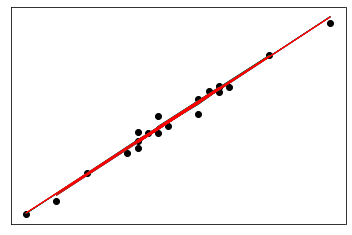

In [36]:
print("Normal linear regression:")
print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)
print("\n")

print("Ridge regression:")
print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)
print("\n")

print("Lasso regression:")
print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)
print("\n")

plt.scatter(Xtest["preperformance"], Ytest, color='black')
plt.plot(Xtest["preperformance"], Ypred, color='blue', linewidth=1)
plt.plot(Xtest["preperformance"], ridge_Ypred, color='green', linewidth=1)
plt.plot(Xtest["preperformance"], lasso_Ypred, color='red', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

# Save model
Saves the choosen model(s) to a file to be used in the recommendation engine.

In [3]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

filename = 'saved_model.sav'
# pickle.dump(ridge, open(filename, 'wb'))